### File Upload Test

In [19]:
import requests
import json
from IPython.display import display, HTML, Markdown, clear_output
from dotenv import load_dotenv
from openai import AzureOpenAI
import os

load_dotenv(override=True)

import threading

# Function to process and display the streamed response
def process_streamed_response(response):
    buffer = ''
    try:
        for line in response.iter_lines(decode_unicode=True):
            if line:
                print(line)
                if line.startswith('data: '):
                    data_content = line[len('data: '):]
                    # Parse JSON data
                    data_dict = json.loads(data_content)
                    content = data_dict.get('content', '')
                    buffer += content
                    # Clear the output and display the updated content
                    clear_output(wait=True)
                    if buffer.count('```') % 2 == 1:
                        display(Markdown(buffer + '```'))
                    else:
                        display(Markdown(buffer))
        # Ensure the final content is displayed
        clear_output(wait=True)
        display(Markdown(buffer))
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        response.close()

In [20]:
client = AzureOpenAI(
            azure_endpoint=os.environ["AOAI_ENDPOINT"],
            api_key=os.environ["AOAI_KEY"],
            api_version=os.getenv("AZURE_OPENAI_API_VERSION", "2024-02-15-preview"),
        )

In [21]:
file = client.files.create(
  file=open("power_consumption.csv", "rb"),
  purpose='assistants'
)
file

FileObject(id='assistant-F1HWMDXyhZseQ0BNYiy1DY80', bytes=4248936, created_at=1728068379, filename='power_consumption.csv', object='file', purpose='assistants', status='processed', status_details=None)

In [22]:
message = "Plot out zone 2 power consumption"

In [23]:
thread = client.beta.threads.create(
  messages=[
    {
      "role": "user",
      "content": message,
      "file_ids": [file.id] # file id will look like: "assistant-R9uhPxvRKGH3m0x5zBOhMjd2" 
    }
  ]
)
thread

Thread(id='thread_EOuU4lqg32O2koUAMp8TyyXY', created_at=1728068401, metadata={}, object='thread', tool_resources=None)

<i>Launching Code Interpreter...</i>
 ``` import pandas as pd

# Load the CSV file
file_path = '/mnt/data/assistant-F1HWMDXyhZseQ0BNYiy1DY80'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()import matplotlib.pyplot as plt

# Convert the DateTime column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%m/%d/%Y %H:%M')

# Plot Zone 2 Power Consumption
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption', color='blue')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Zone 2 Power Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()
 ``` 
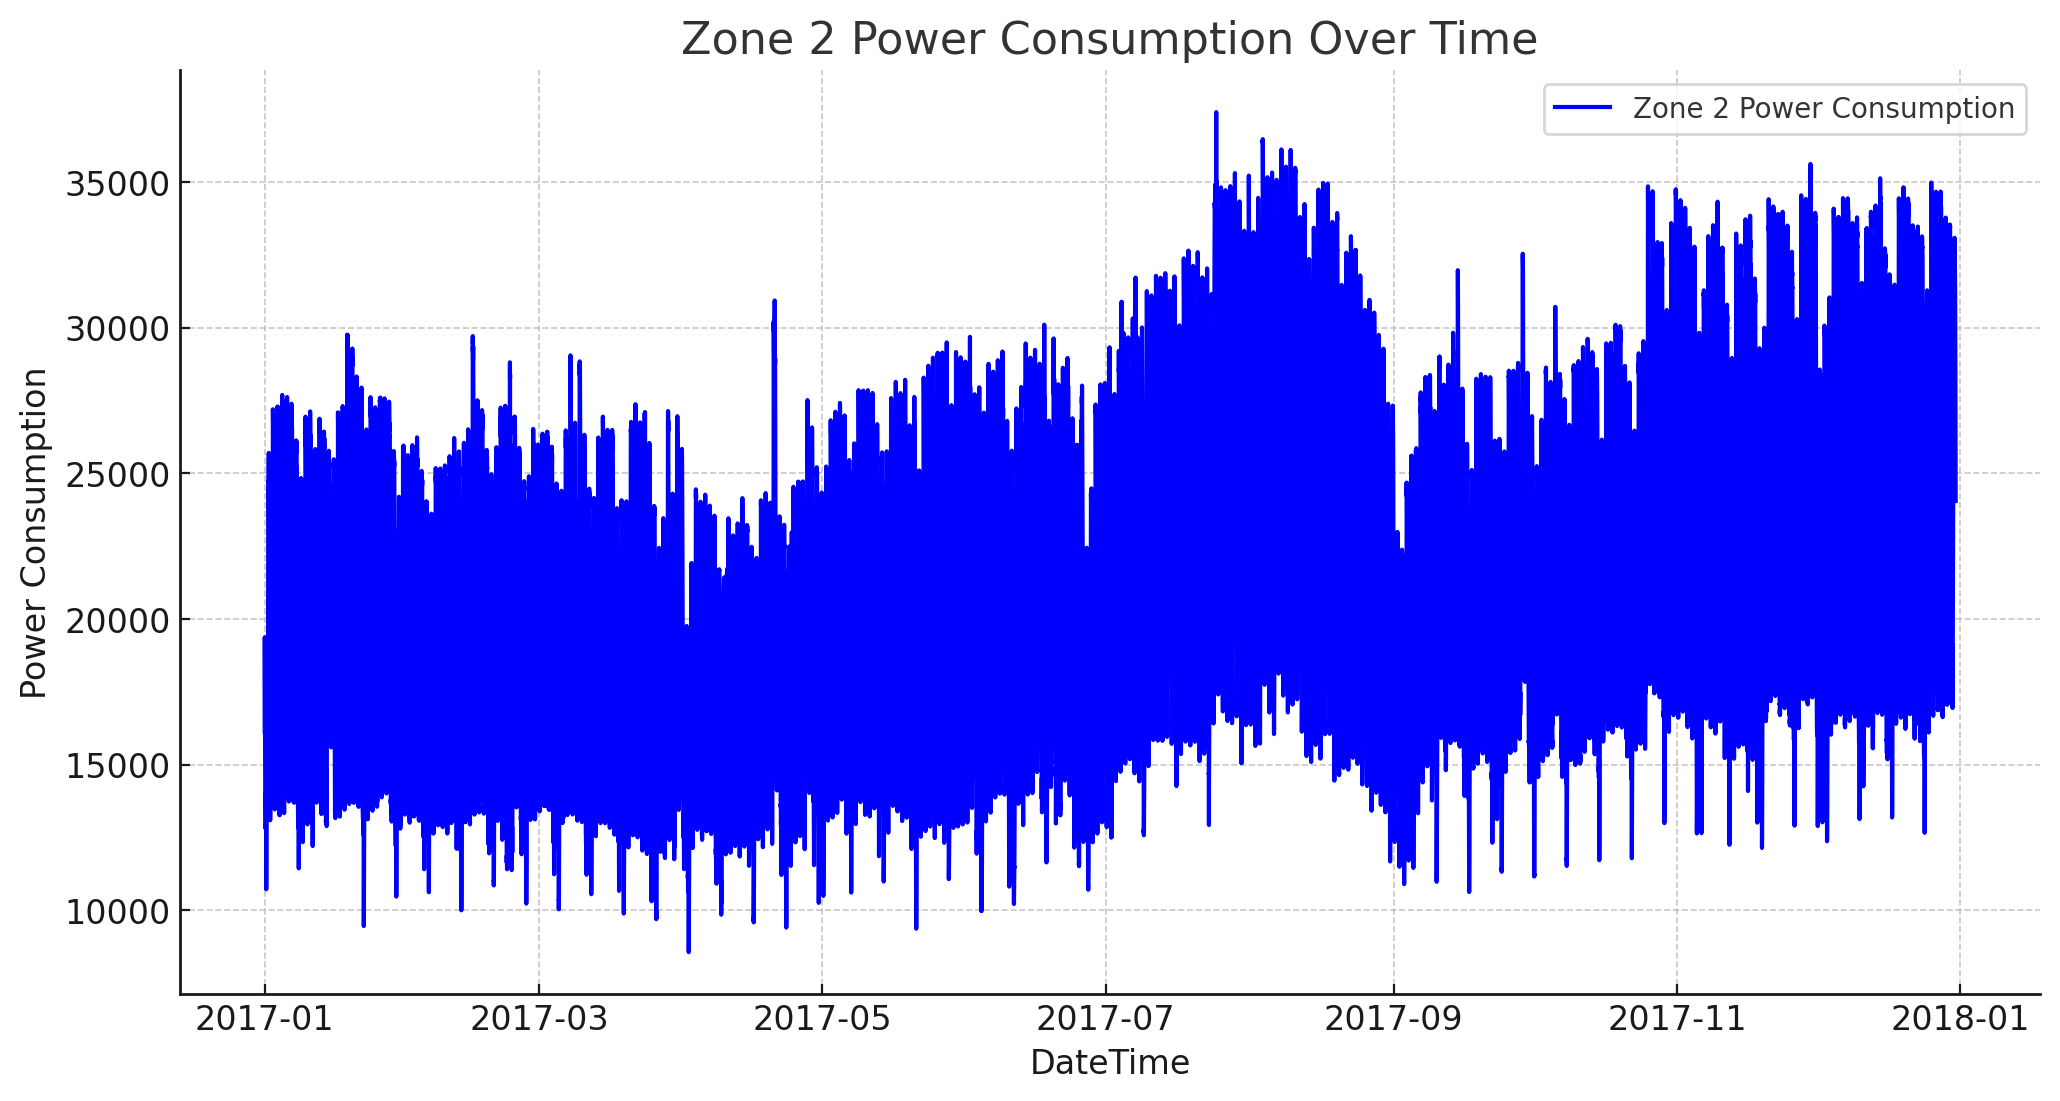<br><br>Here is the plot showing the power consumption for Zone 2 over time. If you need any further analysis or additional plots, please let me know!

In [24]:
url = os.environ['AZURE_URL'] + '/run_assistant'

data={
    'thread_id': thread.id, 
    'message': message
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    lthread = threading.Thread(target=process_streamed_response, args=(response,))
    lthread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Let's apply a 1000-point boxcar smoothing filter to the Zone 2 power consumption data and overlay it on the existing plot. We'll use a moving average to achieve the smoothing effect.<i>Launching Code Interpreter...</i>
 ``` # Apply a 1000-point boxcar smoothing filter (moving average)
window_size = 1000
data['Zone 2 Power Consumption Smoothed'] = data['Zone 2  Power Consumption'].rolling(window=window_size, center=True).mean()

# Plot Zone 2 Power Consumption with smoothing filter
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption', color='blue', alpha=0.5)
plt.plot(data['DateTime'], data['Zone 2 Power Consumption Smoothed'], label='Smoothed (1000-pt Boxcar)', color='red')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Zone 2 Power Consumption Over Time with 1000-pt Boxcar Smoothing Filter')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
 ``` 
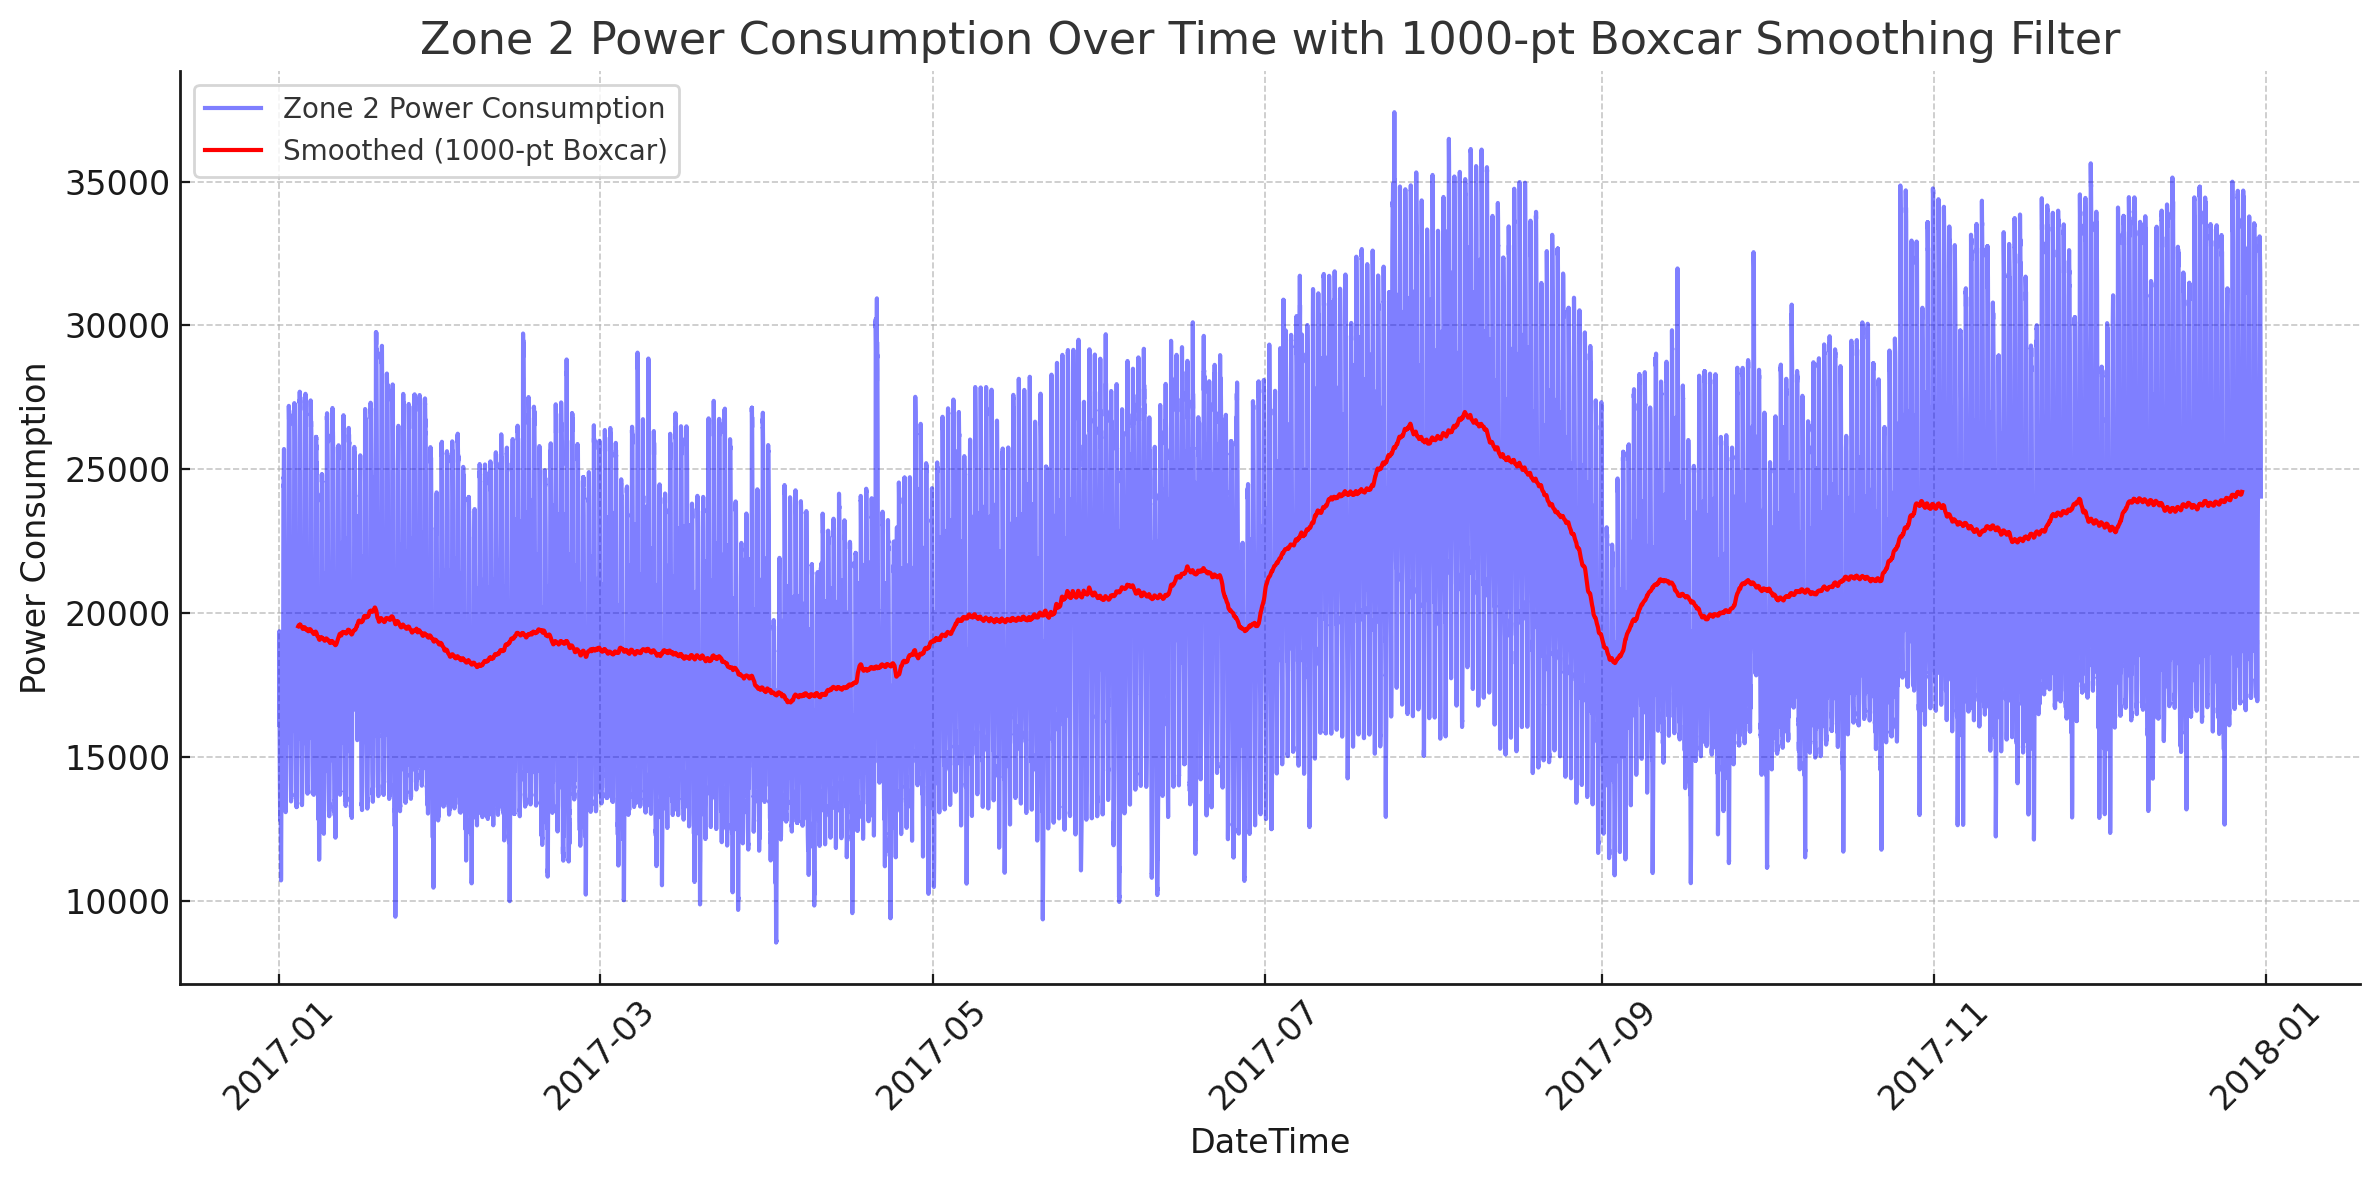<br><br>The plot now includes the original Zone 2 power consumption data (in blue) and the smoothed data using a 1000-point boxcar smoothing filter (in red). If you need any further analysis or modifications, please let me know!

In [17]:
message = "Overlay a 1000-pt boxcar smoothing filter on the plot"

url = os.environ['AZURE_URL'] + '/run_assistant'

data={
    'thread_id': thread.id, 
    'message': message
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    lthread = threading.Thread(target=process_streamed_response, args=(response,))
    lthread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Let's plot the smoothed power consumption data for all three zones. We'll apply the same 1000-point boxcar smoothing filter to each zone and then plot the smoothed lines.<i>Launching Code Interpreter...</i>
 ``` # Apply a 1000-point boxcar smoothing filter to all zones
data['Zone 1 Power Consumption Smoothed'] = data['Zone 1 Power Consumption'].rolling(window=window_size, center=True).mean()
data['Zone 2 Power Consumption Smoothed'] = data['Zone 2  Power Consumption'].rolling(window=window_size, center=True).mean()
data['Zone 3 Power Consumption Smoothed'] = data['Zone 3  Power Consumption'].rolling(window=window_size, center=True).mean()

# Plot smoothed power consumption for all zones
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Zone 1 Power Consumption Smoothed'], label='Zone 1 Smoothed', color='green')
plt.plot(data['DateTime'], data['Zone 2 Power Consumption Smoothed'], label='Zone 2 Smoothed', color='red')
plt.plot(data['DateTime'], data['Zone 3 Power Consumption Smoothed'], label='Zone 3 Smoothed', color='blue')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Smoothed Power Consumption Over Time for All Zones (1000-pt Boxcar)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
 ``` 
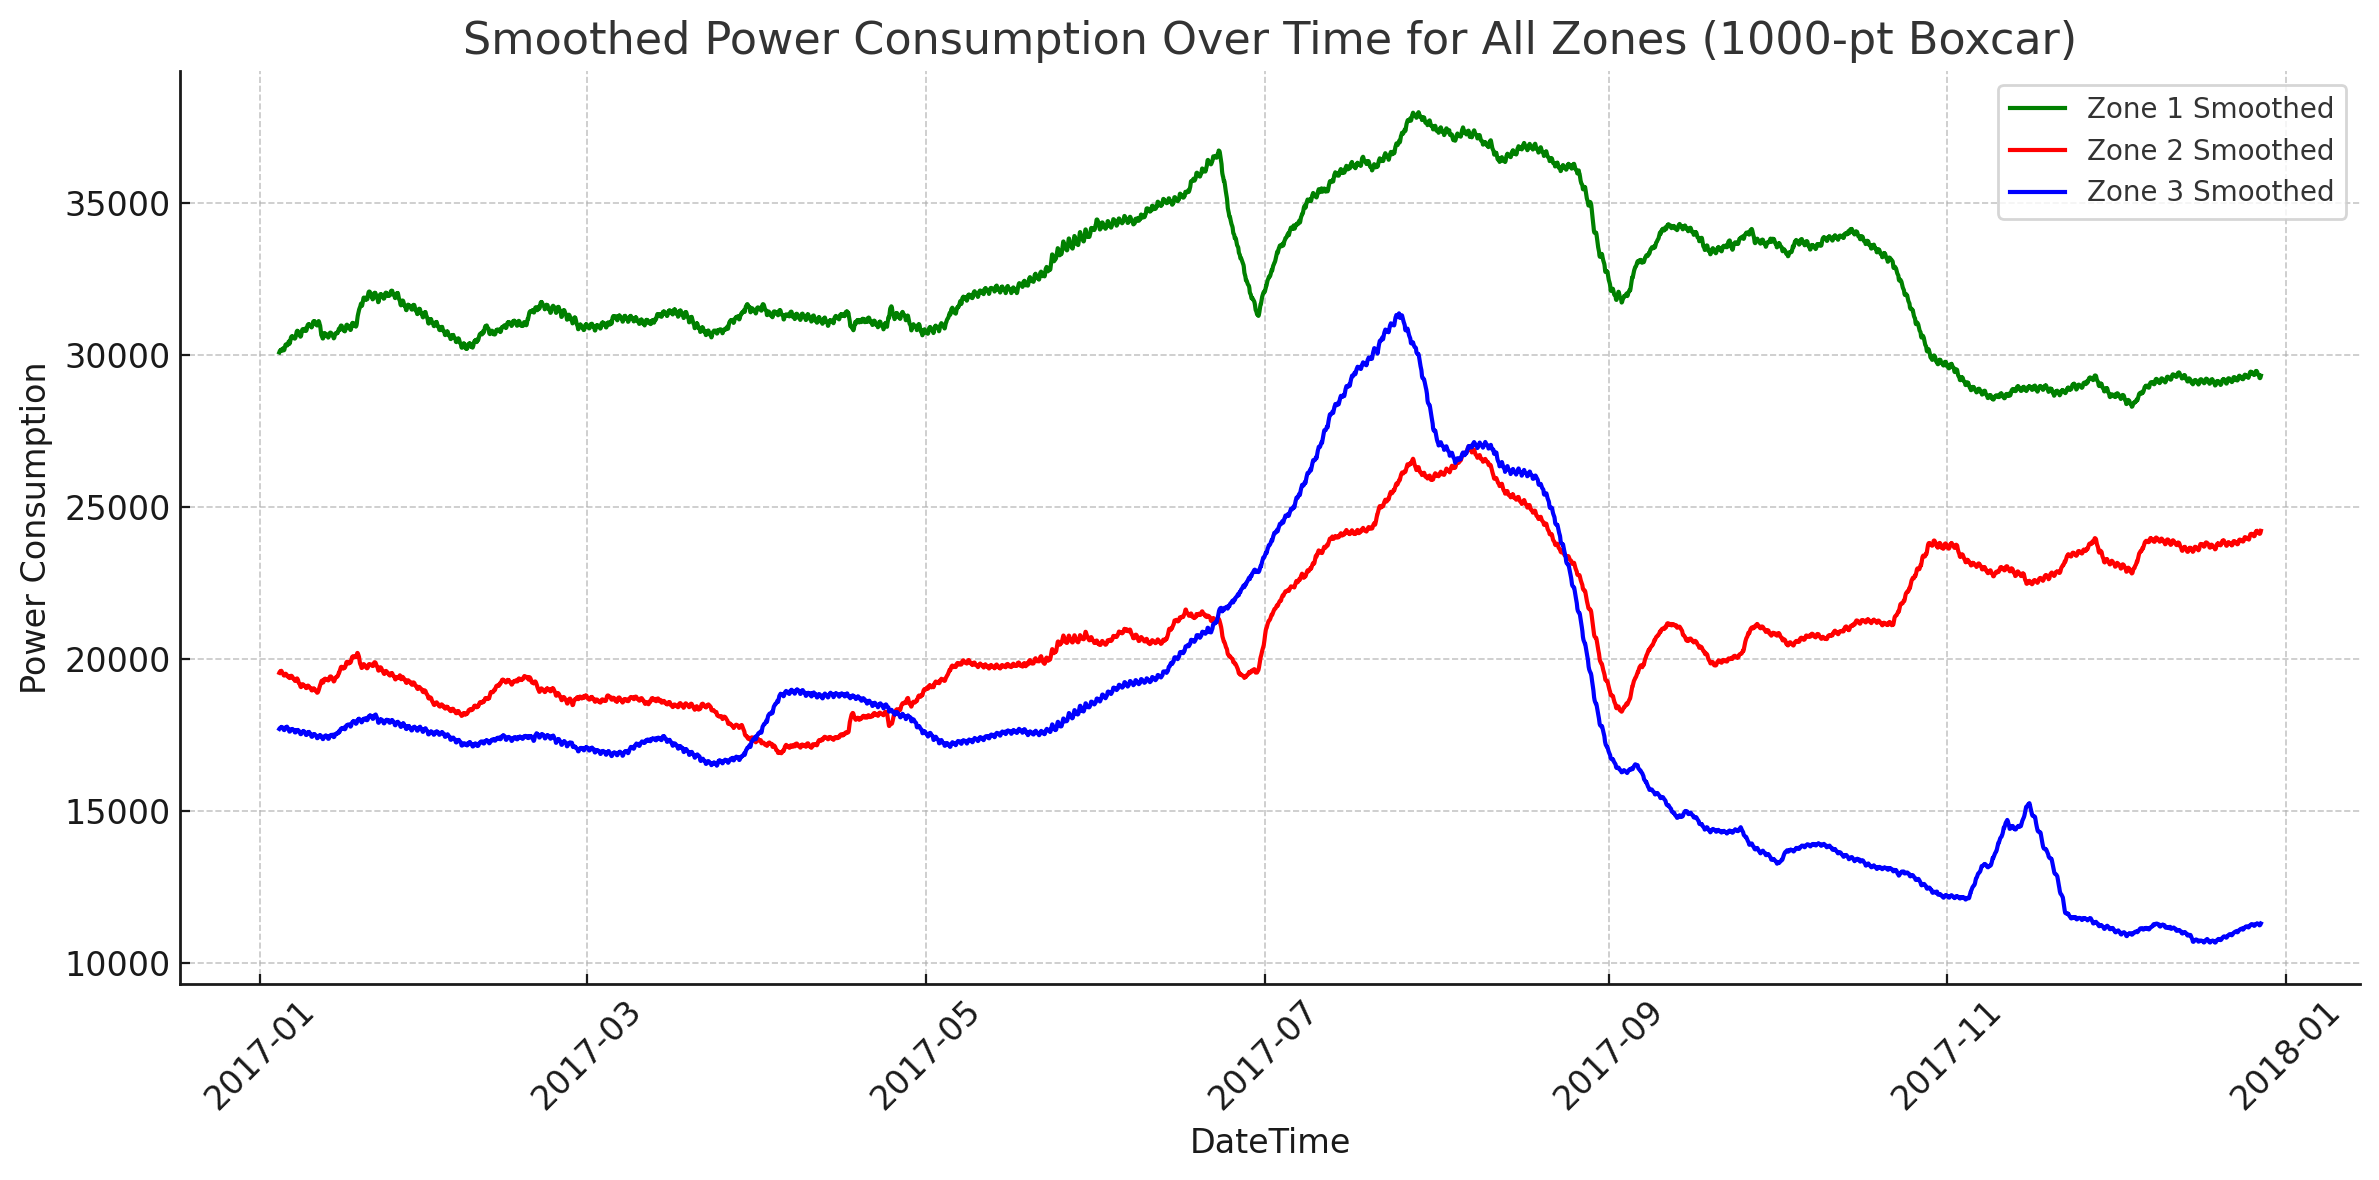<br><br>The plot shows the smoothed power consumption data for all three zones using a 1000-point boxcar smoothing filter. Each zone is represented by a different color:

- Zone 1: Green
- Zone 2: Red
- Zone 3: Blue

If you need any further analysis or modifications, please let me know!

In [18]:
message = "Alright now plot all zones but just with the smoothed line"

url = os.environ['AZURE_URL'] + '/run_assistant'

data={
    'thread_id': thread.id, 
    'message': message
}

# Send the POST request with stream=True
response = requests.post(url, json=data, stream=True)

# Check if the request was successful
if response.status_code == 200:
    # Start a separate thread to process the response
    lthread = threading.Thread(target=process_streamed_response, args=(response,))
    lthread.start()
else:
    print(f"Error: {response.status_code}")
    print(response.text)